# Learning and Decision Making

## Laboratory 2: Markov chains

In the end of the lab, you should submit all code/answers written in the tasks marked as "Activity n. XXX", together with the corresponding outputs and any replies to specific questions posed to the e-mail <adi.tecnico@gmail.com>. Make sure that the subject is of the form [&lt;group n.&gt;] LAB &lt;lab n.&gt;.

### 1. Modeling

Consider once again the simplified Trivial game described in the Homework and for which you wrote a Markov chain model:

<img src="trivial.png" width="400px">

Recall that your chain should describe a single player, where: 

* The player rolls a single die in each play; 
* At each intersection, the player continues along any of the possible intersecting paths with equal probability. 

---

#### Activity 1.        

Implement your Markov chain model in Python. In particular,

* Create a list with all the states;
* Define a `numpy` array with the corresponding transition probabilities.

The order for the states used in the transition probability matrix should match that in the list of states. 

**Note 1**: Don't forget to import `numpy`. If you need additional matrix operations (such as matrix powers or eigenvalues and eigenvectors), you may also import the library `numpy.linalg`.

**Note 2**: Make sure to print the result in the end.

---

In [27]:
import numpy as np

states = [0,1,2,3,4,5,6,7,8,9]
print('states:', states)

P1 = np.array([[0,1/2,0,0,0,1/2,0,0,0,0],
               [1/3,0,1/3,0,0,0,0,1/3,0,0],
               [0,1/2,0,1/2,0,0,0,0,0,0],
               [0,0,1/3,0,1/3,0,0,0,1/3,0],
               [0,0,0,1/2,0,1/2,0,0,0,0],
               [1/3,0,0,0,1/3,0,1/3,0,0,0],
               [0,0,0,0,0,1/2,0,0,0,1/2],
               [0,1/2,0,0,0,0,0,0,0,1/2],
               [0,0,0,1/2,0,0,0,0,0,1/2],
               [0,0,0,0,0,0,1/3,1/3,1/3,0]]) 

P2 = np.linalg.matrix_power(P1,2)
P3 = np.linalg.matrix_power(P1,3)
P4 = np.linalg.matrix_power(P1,4)
P5 = np.linalg.matrix_power(P1,5)
P6 = np.linalg.matrix_power(P1,6)
M = P1*(1/6)+P2*(1/6)+P3*(1/6)+P4*(1/6)+P5*(1/6)+P6*(1/6)

print('\nTransition probability matrix:\n', M)

states: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Transition probability matrix:
 [[0.12345679 0.18518519 0.08333333 0.06481481 0.08333333 0.18518519
  0.08333333 0.08333333 0.04320988 0.06481481]
 [0.12345679 0.18518519 0.12345679 0.10493827 0.04320988 0.10493827
  0.04320988 0.12345679 0.04320988 0.10493827]
 [0.08333333 0.18518519 0.12345679 0.18518519 0.08333333 0.06481481
  0.04320988 0.08333333 0.08333333 0.06481481]
 [0.04320988 0.10493827 0.12345679 0.18518519 0.12345679 0.10493827
  0.04320988 0.04320988 0.12345679 0.10493827]
 [0.08333333 0.06481481 0.08333333 0.18518519 0.12345679 0.18518519
  0.08333333 0.04320988 0.08333333 0.06481481]
 [0.12345679 0.10493827 0.04320988 0.10493827 0.12345679 0.18518519
  0.12345679 0.04320988 0.04320988 0.10493827]
 [0.08333333 0.06481481 0.04320988 0.06481481 0.08333333 0.18518519
  0.12345679 0.08333333 0.08333333 0.18518519]
 [0.08333333 0.18518519 0.08333333 0.06481481 0.04320988 0.06481481
  0.08333333 0.12345679 0.08333333 0.18518519]
 [0.0432

---

#### Activity 2.

Compute the probability of the following trajectories:

* "Pink with pie piece" - "Green in outer rim" - "Blue with pie slice" - "Pink in outer rim"
* "Pink with pie piece" - "Pink with pie piece" - "Blue in outer rim"
* "Center" - "Pink with pie piece" - "Blue in outer rim"

**Note:** Make sure to print the result in the end.

---

In [2]:
green_out = states[0]
blue_pie = states[1]
pink_out = states[2]
blue_out = states[4]
pink_pie = states[5]
center = states[9]

pink_pie_to_green_out = M[pink_pie][green_out]
green_out_to_blue_pie = M[green_out][blue_pie]
blue_pie_to_pink_out = M[blue_pie][pink_out]
pink_pie_to_pink_pie = M[pink_pie][pink_pie]
pink_pie_to_blue_out = M[pink_pie][blue_out]
center_to_pink_pie = M[center][pink_pie]


first_prob = pink_pie_to_green_out * green_out_to_blue_pie * blue_pie_to_pink_out
second_prob = pink_pie_to_pink_pie * pink_pie_to_blue_out
third_prob = center_to_pink_pie * pink_pie_to_blue_out

print("Pink with pie piece - Green in outer rim - Blue with pie slice - Pink in outer rim, probability: ", first_prob)
print("Pink with pie piece - Pink with pie piece - Blue in outer rim, probability: ", second_prob)
print("Center - Pink with pie piece - Blue in outer rim, probability: ", third_prob)


Pink with pie piece - Green in outer rim - Blue with pie slice - Pink in outer rim, probability:  0.0028225146347383807
Pink with pie piece - Pink with pie piece - Blue in outer rim, probability:  0.022862368541380886
Center - Pink with pie piece - Blue in outer rim, probability:  0.012955342173449168


### 2. Stability

---

#### Activity 3.

Justify whether the chain implemented in Activity #1 is:

* Irreducible
* Aperiodic
* Ergodic

---

The chain is irreducible because it is possible to get to any state from any state. This can be seen in the matrix corresponding to the transiction probabilities (M) because all of the probabilities (all the matrix values) are different than 0, which means that it is possible to reach any state in 1 step.

The chain is aperiodic (periodicity=1). For example, the pink with pie piece state is aperiodic because any return to that state must occur in multiples of 1 time steps, meaning that it could happen in any step. And because as said above, the chain is irreducible, if it has even just one aperiodic state then, by definition, the whole chain is also aperiodic.

Because the chain is irreducible and aperiodic then it is also ergodic.

---

#### Activity 4

Compute the stationary distribution for the chain.

**Note:** The stationary distribution is a *left* eigenvector of the transition probability matrix associated to the eigenvalue 1. As such, you may find useful the numpy function `numpy.linalg.eig`. Also, recall that the stationary distribution is *a distribution*.

---

In [103]:
w, v = np.linalg.eig(M.T)

index=np.argmax(w)
array = v[:,index]

normalized = array/np.sum(array)
print(normalized.real)

[0.08333333 0.125      0.08333333 0.125      0.08333333 0.125
 0.08333333 0.08333333 0.08333333 0.125     ]


### 3. Simulation

You are now going to *simulate* the Markov chain that you defined in Question #1.

---

#### Activity 5

Generate a 10,000-step long trajectory of the chain defined in Activity #1. 

---

In [92]:
steps = np.empty(10000)

pos = np.random.randint(np.min(states), np.max(states), size=1)[0]

for i in range(9999):
    pos = np.random.choice(np.arange(0, 10), p=M[pos])
    steps[i] = pos    


print(steps)

[3. 8. 1. ... 3. 2. 9.]


---

#### Activity 6

Draw a histogram of the trajectory generated in Activity #5. Make sure that the histogram has one bin for each state. Compare the relative frequencies with the result of Activity #4.

**Note**: Don't forget to load `matplotlib`.

---

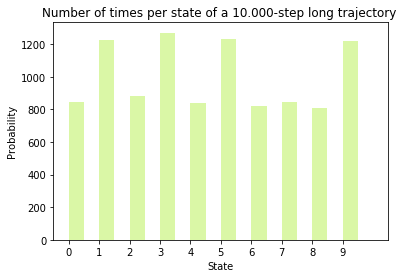

In [93]:
import matplotlib as mp
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(steps,bins=range(11),width=0.5,color='#DAF7A6')

plt.xlabel('State')
plt.ylabel('Probability')
plt.title('Number of times per state of a 10.000-step long trajectory ')
x=[0,1,2,3,4,5,6,7,8,9]
plt.xticks(x)
plt.show()

With a very large number of steps, with time, it tends to the stationary distribution.

By looking at the histogram we can tell that the states the player visits the most are the ones that have higher stationary distribution (states 1,3,5,9).